In [1]:
import pandas as pd

#For text processing
#Using this (https://bit.ly/2HvV2dx) as template
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer #, SnowballStemmer
from nltk.stem.porter import *
from nltk.tokenize import RegexpTokenizer, sent_tokenize, word_tokenize
tokenizer = RegexpTokenizer(r'\w+')
import numpy as np
np.random.seed(2018)
import nltk


In [2]:
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chtra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chtra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
# import pandas as pd

df=pd.read_pickle('hiking_attributes_ontario.pkl')
print (len(df))
# df['review'][0]
df.head(50)

df_work=df.copy()
df_work.head(10)
# df_work.route_type.head()

437


,difficulty,distance,elevation,name,nreviews,route_type,stars,trail_attributes
0,EASY,15.9 km,149 m,Highland Creek Trail,33,Loop,4.4,"[dogs on leash, hiking, mountain biking, road ..."
1,EASY,5 km,14 m,Unionville Valleylands Trail,29,Loop,3.9,"[dogs on leash, wheelchair friendly, kid frien..."
2,EASY,15.6 km,166 m,Greenwood Conservation Area Trail,31,Loop,4.1,"[dogs on leash, kid friendly, birding, hiking,..."
3,MODERATE,3.4 km,23 m,Woodland Trail,22,Loop,3.9,"[dogs on leash, kid friendly, hiking, trail ru..."
4,MODERATE,4.7 km,64 m,Hilton Falls Trail,238,Loop,4.3,"[dogs on leash, birding, cross country skiing,..."
5,MODERATE,2.3 km,100 m,Niagara Glen Trail,135,Loop,4.7,"[dogs on leash, kid friendly, hiking, nature t..."
6,MODERATE,7.2 km,128 m,Nassagaweya and Bruce Trail Loop from Rattlesn...,170,Loop,4.2,"[dogs on leash, kid friendly, hiking, nature t..."
7,MODERATE,15.3 km,427 m,Lion's Head Loop Via Bruce Trail,117,Loop,4.8,"[dogs on leash, birding, hiking, nature trips,..."
8,MODERATE,2.9 km,71 m,Dundas Peak via Bruce Trail and BT Side Trail,82,Loop,4.1,"[dogs on leash, birding, hiking, road biking, ..."
9,MODERATE,8 km,222 m,Forks of the Credit and Cataract Falls via Bru...,124,Loop,4.4,"[dogs on leash, birding, hiking, nature trips,..."


In [35]:
#Weighted average of ratings
#Mean rating across all hikes
# df_work['stars'].mean()
ratings=pd.to_numeric(df_work.stars)
ratings.mean()

#Min # of ratings to be included
nreviews=pd.to_numeric(df_work.nreviews)
m=nreviews.quantile(0.8)
print (m)
# print(nreviews)

36.0


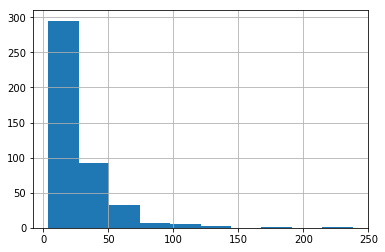

In [52]:
nreviews.hist()
# plt.show()

In [48]:
#Retrieve hikes with nreviews > m
df_work.nreviews=df_work.nreviews.astype(int)
# df_filt=df_work.copy().loc(df_work.nreviews>=m)
# df_work.nreviews

In [12]:
# def lemmatize_stemming(text):
#     return PorterStemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    words=[word for sentence in sent_tokenize(text) for word in word_tokenize(sentence)]
    words=[word for word in words if len(word)>=3]
    words=[word for word in words if word not in gensim.parsing.preprocessing.STOPWORDS]
    words=[WordNetLemmatizer().lemmatize(word) for word in words]
    #Lemmatize
#     words=[WordNetLemmatizer.lemmatize(word) for word in words]
    return words

In [18]:
import string
import re
reviews=df_work.trail_attributes
#tokenize text
# reviews.apply(lambda x: x.lower())
# reviews=reviews.str.lower()
# reviews=reviews.str.replace('\"', '')
# reviews=reviews.str.replace("\'", '')
# reviews=reviews.str.replace('\"', '')
# reviews=reviews.str.replace('\!', '')
# reviews=reviews.str.replace('\/', ' ')
# reviews=reviews.str.replace(',', '')
# reviews=reviews.str.replace('(', '')
# reviews=reviews.str.replace(')', '')
# reviews=reviews.str.replace('.', '')
# reviews=reviews.str.replace('\d+', '')
# reviews=reviews.replace(to_replace={'hike', 'walk','ing','run','trail','water','dog', 'interesting', 'easy','good','great','lot','recommend'}, value='', regex=True)
print(reviews[0])
# processed_text=[preprocess(text) for text in reviews]
# lemmatized_text=[WordNetLemmatizer.lemmatize(text) for text in reviews]
# WordNetLemmatizer.lemmatize('are')

# reviews.head(50)
# print (processed_text[0], reviews[0])
# print ()

['dogs on leash', 'hiking', 'mountain biking', 'road biking', 'trail running', 'walking', 'lake', 'partially paved']


In [245]:
#Add processed text as a new column
# df_work['processed_text']= pd.Series(processed_text)
# df_work.head()
#[' '.join(filter(None,filter(lambda word: word not in stop, line))) for line in data['text_data'].str.lower().str.split(' ')]

,difficulty,distance,elevation,name,review,processed_text
0,EASY,15.9 km,149 m,Highland Creek Trail,Parts of this trail are very interesting but i...,"[part, paved, time, roadway, closed, couple, p..."
1,EASY,15.9 km,149 m,Highland Creek Trail,good trail as fun for biking,"[fun, bik]"
2,EASY,15.9 km,149 m,Highland Creek Trail,A paved trail that takes you through wooded a...,"[paved, take, wooded, area, spent, hour, came,..."
3,EASY,15.9 km,149 m,Highland Creek Trail,Started at west entrance of east point park fo...,"[started, west, entrance, east, point, park, q..."
4,EASY,15.9 km,149 m,Highland Creek Trail,"A beautiful, easy trail that traverses beautif...","[beautiful, traverse, beautiful, wooded, area,..."


In [246]:
df_work.processed_text[0]

['part',
 'paved',
 'time',
 'roadway',
 'closed',
 'couple',
 'place',
 'forc',
 'road',
 'probably',
 'route',
 'bike']

In [247]:
#Creating word countf for IDF
from sklearn.feature_extraction.text import CountVectorizer
import re
 
def get_stop_words(stop_file_path):
    """load stop words """
    
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return frozenset(stop_set)
 
#load a set of stop words
stopwords=get_stop_words("./stop_words.txt")
 
#get the text column 
docs=df_work['processed_text'][0] #.tolist()
 
#create a vocabulary of words, 
#ignore words that appear in 85% of documents, 
#eliminate stop words
cv=CountVectorizer(max_df=0.85,stop_words=stopwords)
word_count_vector=cv.fit_transform(docs)

In [248]:
list(cv.vocabulary_.keys())[:20]

['part',
 'paved',
 'time',
 'roadway',
 'closed',
 'couple',
 'place',
 'forc',
 'road',
 'route',
 'bike']

In [249]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)
 

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [250]:
from gensim import corpora
dictionary = corpora.Dictionary(df_work['processed_text'])
corpus = [dictionary.doc2bow(text) for text in df_work['processed_text']]
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [251]:
import gensim
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.036*"nice" + 0.014*"beautiful" + 0.012*"area" + 0.011*"river"')
(1, '0.032*"park" + 0.019*"nice" + 0.019*"winter" + 0.014*"route"')
(2, '0.014*"park" + 0.012*"nice" + 0.012*"got" + 0.012*"spot"')
(3, '0.025*"fall" + 0.024*"beautiful" + 0.019*"nice" + 0.017*"view"')
(4, '0.022*"view" + 0.016*"lake" + 0.014*"beautiful" + 0.013*"loop"')


In [235]:
# run word2vec model and then save it
texts_stemmed = filter(None, [next_text.strip(' ').split(' ') for next_text in df_work['processed_text'][0]])
w2vmodel_stemmed = gensim.models.Word2Vec(texts_stemmed, size=100, window=5, min_count=5, workers=4)
w2vmodel_stemmed.save(savefolder+'w2v_stemmed_model')

RuntimeError: you must first build vocabulary before training the model